In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import signal
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, RationalQuadratic, ExpSineSquared
from loess.loess_1d import loess_1d
from statsmodels.nonparametric.smoothers_lowess import lowess
from tvregdiff import TVRegDiff
import pandas as pd
from scipy.optimize import curve_fit

In [95]:
def create_exp(N, A, B):
    expo = A*np.exp(-B*np.arange(0,N))
    return expo
def create_lin(N, a, b):
    lin = a*np.arange(0,N) + b
    return lin
def concat_noise(C, m = 0, s = 1):
    # import numpy as np
    concat = []
    for c in C:
        concat.extend(c)
    X = np.arange(0,len(concat))
    Y = concat +  np.random.normal(loc=m, scale=s, size=len(concat))
    return X, Y

def RMSE(Ypred, Yreal):
    rmse = np.sqrt(np.sum(np.square(Ypred-Yreal))/np.shape(Ypred)[0])
    return rmse
def fit_and_pred(X, y):
    Xarr = np.array(X).reshape(-1,1)
    yarr = np.array(y).reshape(-1,1)
    reg = LinearRegression().fit(Xarr, yarr)
    pred = reg.predict(Xarr)
    rmse = RMSE(pred, yarr)
    return rmse
def sliding_window_pred(X, y, window, lag):
    Xmax = np.shape(X)[0]-window+1
    start = np.arange(0, Xmax, lag)
    mean_start = X[[int(s + window/2) for s in start]]
    score = [fit_and_pred(X[s:s+window], y[s:s+window]) 
            for s in start]    
    return score, mean_start

# def func(x, a, b):
#     return a * np.exp(-b * x) + c
def func(x, a, b):
    return a * np.exp(-b * x) 

def fit_and_pred_exp(X, y, b, p):
    Xarr = np.array(X).reshape(-1)
    yarr = np.array(y).reshape(-1)
    reg = curve_fit(func, Xarr, yarr, bounds=b)[0]
#     A, B, C = reg
    A, B = reg
    if p:
        print('fit: a=%5.3f, b=%5.6f' % tuple(reg))
#     print('fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(reg))
    pred = A * np.exp(-B * Xarr) #+ C
    rmse = RMSE(pred, yarr)
    return rmse

def sliding_window_exp_pred(X, y, window, lag, b=([9,  0.00001], [11.,  0.001]), p = False):
    Xmax = np.shape(X)[0]-window+1
    start = np.arange(0, Xmax, lag)
    mean_start = X[[int(s + window/2) for s in start]]
    score = [fit_and_pred_exp(X[s:s+window], y[s:s+window], b=b, p = p) 
            for s in start]    
    return score, mean_start

# Simulated data

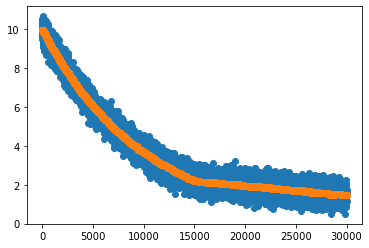

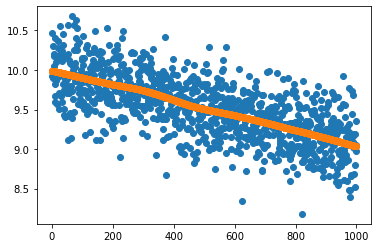

In [54]:
expo = create_exp(N = 15000, A = 10 , B = 0.0001)
lin = create_lin(N = 15000, a = -0.00005 , b = expo[-1]-0.01*expo[-1])

X, Y = concat_noise(C = [expo,lin], m = 0, s = 0.3)
Ysmooth = lowess(exog = X, endog = Y, frac = 0.01, delta = 0.001 * X.shape[0], return_sorted = False)

plt.scatter(X,Y)
plt.scatter(X,Ysmooth)
plt.show()

plt.scatter(X[0:1000],Y[0:1000])
plt.scatter(X[0:1000],Ysmooth[0:1000])
plt.show()

## linear RMSE

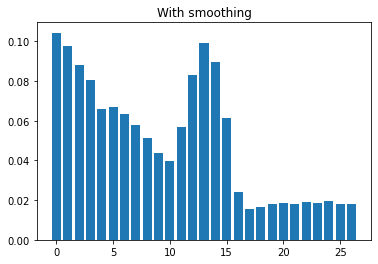

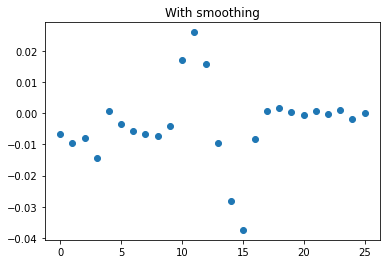

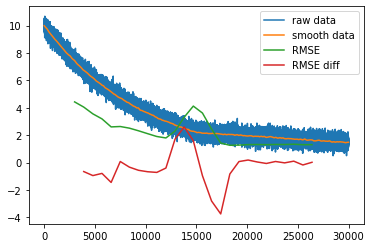

In [62]:
score,Xscore  = sliding_window_pred(X = X, y = Ysmooth, 
                            window = 6000, 
                            lag = 900)
plt.bar(np.arange(0,np.shape(score)[0]),score)
plt.title('With smoothing')
plt.show()
plt.scatter(np.arange(0,np.shape(np.diff(score))[0]),np.diff(score))
plt.title('With smoothing')
plt.show()

plt.plot(X,Y, label = 'raw data')
plt.plot(X, Ysmooth, label = 'smooth data')
plt.plot(Xscore,(1+np.array(score))**15, label = 'RMSE') # amplified in order to have similar scale with raw signal
plt.plot(Xscore[1:],np.diff(score)*100, label = 'RMSE diff')
plt.legend()
plt.show()

## Exponential RMSE

b is a bound parameters for A and B parameters of the exponential function 

this setting can deeply influence non linear regression

fit: a=10.016, b=0.000101
fit: a=10.018, b=0.000101
fit: a=10.018, b=0.000101
fit: a=10.006, b=0.000100
fit: a=10.000, b=0.000100
fit: a=10.015, b=0.000101
fit: a=9.972, b=0.000100
fit: a=9.954, b=0.000099
fit: a=9.987, b=0.000100
fit: a=9.995, b=0.000100
fit: a=10.010, b=0.000100
fit: a=10.007, b=0.000100
fit: a=9.952, b=0.000099
fit: a=9.959, b=0.000100
fit: a=9.988, b=0.000100
fit: a=9.992, b=0.000100
fit: a=9.941, b=0.000099
fit: a=9.969, b=0.000100
fit: a=10.045, b=0.000101
fit: a=10.158, b=0.000101
fit: a=10.313, b=0.000103
fit: a=10.122, b=0.000101
fit: a=9.569, b=0.000097
fit: a=9.001, b=0.000092
fit: a=9.000, b=0.000091
fit: a=9.000, b=0.000091
fit: a=9.000, b=0.000090
fit: a=9.000, b=0.000089
fit: a=9.000, b=0.000088
fit: a=9.000, b=0.000086
fit: a=9.000, b=0.000084
fit: a=9.000, b=0.000083
fit: a=9.000, b=0.000081
fit: a=9.000, b=0.000079
fit: a=9.000, b=0.000078
fit: a=9.000, b=0.000077
fit: a=9.000, b=0.000075
fit: a=9.000, b=0.000074
fit: a=9.000, b=0.000073
fit: a=9.000,

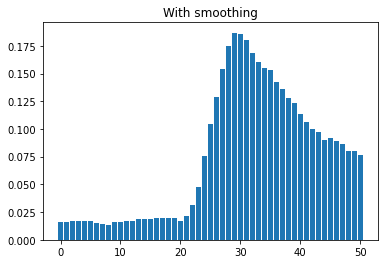

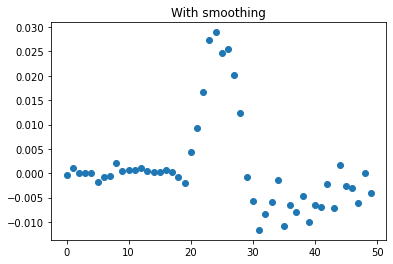

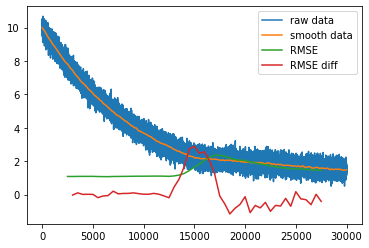

In [96]:
score,Xscore  = sliding_window_exp_pred(X = X, y = Ysmooth, 
                            window = 5000, 
                            lag = 500, b=([9,  0.00001], [11.,  0.001]), p =True)
plt.bar(np.arange(0,np.shape(score)[0]),score)
plt.title('With smoothing')
plt.show()
plt.scatter(np.arange(0,np.shape(np.diff(score))[0]),np.diff(score))
plt.title('With smoothing')
plt.show()

plt.plot(X,Y, label = 'raw data')
plt.plot(X, Ysmooth, label = 'smooth data')
plt.plot(Xscore,(1+np.array(score))**5, label = 'RMSE') # amplified in order to have similar scale with raw signal
plt.plot(Xscore[1:],np.diff(score)*100, label = 'RMSE diff')
plt.legend()
plt.show()

## Both linear and exp RMSE

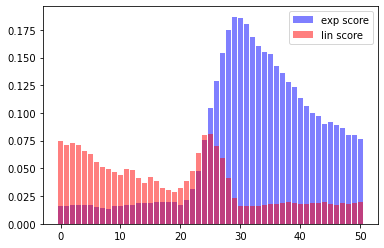

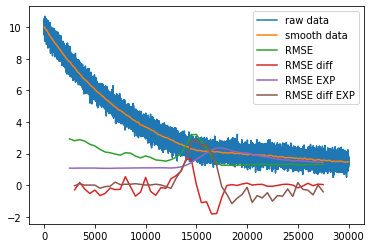

In [97]:
score,Xscore  = sliding_window_pred(X = X, y = Ysmooth, 
                            window = 5000, 
                            lag = 500)

score_exp,Xscore_exp  = sliding_window_exp_pred(X = X, y = Ysmooth, 
                            window = 5000, 
                            lag = 500, b=([9,  0.00001], [11.,  0.001]), p = False)


plt.bar(np.arange(0,len(score_exp)),score_exp, label = 'exp score', fc=(0, 0, 1, 0.5))
plt.bar(np.arange(0,len(score)),score, label = 'lin score', fc=(1, 0, 0, 0.5))
plt.legend()
plt.show()

plt.plot(X,Y, label = 'raw data')
plt.plot(X, Ysmooth, label = 'smooth data')
plt.plot(Xscore,(1+np.array(score))**15, label = 'RMSE') # amplified in order to have similar scale with raw signal
plt.plot(Xscore[1:],np.diff(score)*100, label = 'RMSE diff')

plt.plot(Xscore_exp,(1+np.array(score_exp))**5, label = 'RMSE EXP') # amplified in order to have similar scale with raw signal
plt.plot(Xscore_exp[1:],np.diff(score_exp)*100, label = 'RMSE diff EXP')
plt.legend()
plt.show()

This is super nice :)

# Real data

['LituBD5_mass', 'LituLD2_mass', 'LituBL2t_mass', 'LituLL21_mass']


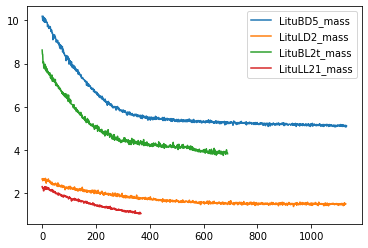

In [99]:
df = pd.read_csv('/home/xavier/Documents/development/time series_dehydration.csv', sep = ",")
df.head()
col = [c for c in df.columns if c != 'time_min']
print(col)
df[col].plot()

test for LituBD5_mass -------------------------------
fit: a=10.218, b=0.000540
fit: a=10.156, b=0.000525
fit: a=10.041, b=0.000503
fit: a=9.869, b=0.000475
fit: a=9.635, b=0.000441
fit: a=9.340, b=0.000402
fit: a=8.991, b=0.000360
fit: a=8.601, b=0.000316
fit: a=8.185, b=0.000270
fit: a=8.041, b=0.000254
fit: a=8.041, b=0.000250
fit: a=8.041, b=0.000245
fit: a=8.041, b=0.000239
fit: a=8.041, b=0.000232
fit: a=8.041, b=0.000225
fit: a=8.041, b=0.000218
fit: a=8.041, b=0.000211
fit: a=8.041, b=0.000203
fit: a=8.041, b=0.000197
fit: a=8.041, b=0.000190
fit: a=8.041, b=0.000184
fit: a=8.041, b=0.000178
fit: a=8.041, b=0.000173
fit: a=8.041, b=0.000168
fit: a=8.041, b=0.000163
fit: a=8.041, b=0.000158
fit: a=8.041, b=0.000154
fit: a=8.041, b=0.000150
fit: a=8.041, b=0.000146
fit: a=8.041, b=0.000142
fit: a=8.041, b=0.000139
fit: a=8.041, b=0.000135
fit: a=8.041, b=0.000132
fit: a=8.041, b=0.000129
fit: a=8.041, b=0.000126
fit: a=8.041, b=0.000124
fit: a=8.041, b=0.000121
fit: a=8.041, b=0.

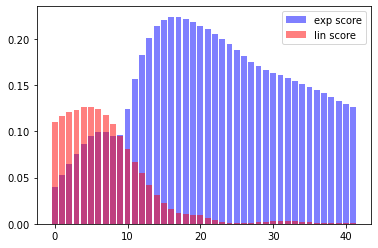

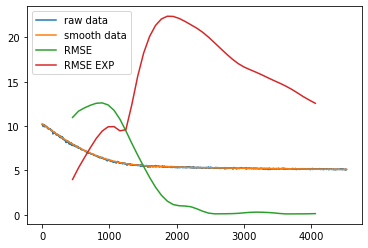

test for LituLD2_mass -------------------------------
fit: a=2.593, b=0.000321
fit: a=2.550, b=0.000289
fit: a=2.508, b=0.000262
fit: a=2.477, b=0.000245
fit: a=2.456, b=0.000235
fit: a=2.443, b=0.000229
fit: a=2.434, b=0.000225
fit: a=2.423, b=0.000220
fit: a=2.405, b=0.000213
fit: a=2.383, b=0.000205
fit: a=2.358, b=0.000196
fit: a=2.330, b=0.000188
fit: a=2.302, b=0.000179
fit: a=2.271, b=0.000170
fit: a=2.237, b=0.000161
fit: a=2.203, b=0.000152
fit: a=2.169, b=0.000144
fit: a=2.132, b=0.000134
fit: a=2.087, b=0.000124
fit: a=2.038, b=0.000112
fit: a=1.992, b=0.000102
fit: a=1.951, b=0.000092
fit: a=1.908, b=0.000083
fit: a=1.862, b=0.000073
fit: a=1.815, b=0.000062
fit: a=1.769, b=0.000053
fit: a=1.730, b=0.000044
fit: a=1.698, b=0.000038
fit: a=1.671, b=0.000032
fit: a=1.646, b=0.000027
fit: a=1.640, b=0.000026
fit: a=1.641, b=0.000026
fit: a=1.642, b=0.000026
fit: a=1.643, b=0.000026
fit: a=1.645, b=0.000026
fit: a=1.647, b=0.000026
fit: a=1.650, b=0.000026
fit: a=1.652, b=0.000

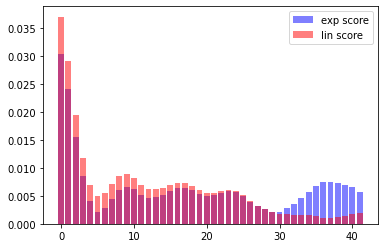

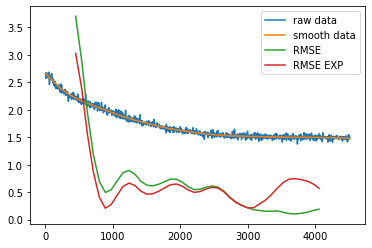

test for LituBL2t_mass -------------------------------
fit: a=8.058, b=0.000625
fit: a=8.049, b=0.000622
fit: a=8.037, b=0.000618
fit: a=8.024, b=0.000613
fit: a=7.994, b=0.000603
fit: a=7.936, b=0.000587
fit: a=7.845, b=0.000564
fit: a=7.714, b=0.000535
fit: a=7.542, b=0.000500
fit: a=7.346, b=0.000463
fit: a=7.151, b=0.000428
fit: a=6.973, b=0.000398
fit: a=6.809, b=0.000371
fit: a=6.648, b=0.000345
fit: a=6.476, b=0.000317
fit: a=6.278, b=0.000286
fit: a=6.062, b=0.000253
fit: a=6.037, b=0.000248
fit: a=6.037, b=0.000246
fit: a=6.037, b=0.000244
fit: a=6.037, b=0.000240
fit: a=6.037, b=0.000237
fit: a=6.037, b=0.000232
fit: a=6.037, b=0.000228
fit: a=6.037, b=0.000223
fit: a=6.037, b=0.000219
fit: a=6.037, b=0.000215
fit: a=6.037, b=0.000211
fit: a=6.037, b=0.000207
fit: a=6.037, b=0.000203
fit: a=6.037, b=0.000199
fit: a=6.037, b=0.000196
fit: a=6.037, b=0.000192
fit: a=6.037, b=0.000189
fit: a=6.037, b=0.000186
fit: a=6.037, b=0.000184
fit: a=6.037, b=0.000182
fit: a=6.037, b=0.00

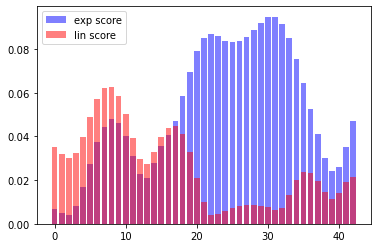

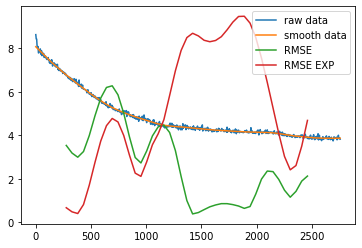

test for LituLL21_mass -------------------------------
fit: a=2.292, b=0.000638
fit: a=2.306, b=0.000670
fit: a=2.314, b=0.000681
fit: a=2.311, b=0.000671
fit: a=2.300, b=0.000651
fit: a=2.287, b=0.000631
fit: a=2.276, b=0.000616
fit: a=2.265, b=0.000602
fit: a=2.252, b=0.000584
fit: a=2.236, b=0.000565
fit: a=2.220, b=0.000546
fit: a=2.204, b=0.000529
fit: a=2.188, b=0.000514
fit: a=2.171, b=0.000499
fit: a=2.159, b=0.000490
fit: a=2.159, b=0.000492
fit: a=2.176, b=0.000505
fit: a=2.199, b=0.000523
fit: a=2.219, b=0.000537
fit: a=2.233, b=0.000545
fit: a=2.239, b=0.000549
fit: a=2.232, b=0.000544
fit: a=2.220, b=0.000537
fit: a=2.204, b=0.000527
fit: a=2.185, b=0.000517
fit: a=2.168, b=0.000507
fit: a=2.159, b=0.000502
fit: a=2.149, b=0.000498
fit: a=2.143, b=0.000494
fit: a=2.146, b=0.000496
fit: a=2.156, b=0.000501
fit: a=2.157, b=0.000502
fit: a=2.156, b=0.000501
fit: a=2.162, b=0.000503
fit: a=2.167, b=0.000505
fit: a=2.148, b=0.000497
fit: a=2.103, b=0.000478
fit: a=2.043, b=0.00

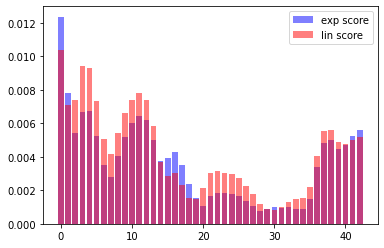

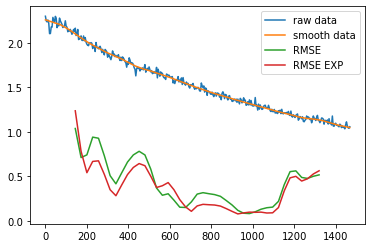

In [108]:
#ectracted from third iteration and then refitted can be automatized later

Bound = [([10.041-2,0.0000503],[10.041+2,0.00503]), #a=5.504, b=0.000016
         ([2.508-2,0.0000262],[2.508+2,0.00262]), #  a=2.000, b=0.000072
         ([8.037-2,0.0000618],[8.037+2,0.00618]), #a=5.119, b=0.000107
         ([2.314-2,0.0000681],[2.314+2,0.00681])] #a=2.000, b=0.000436

i = 0
for c in col:
    
    print('test for {} -------------------------------'.format(c))
    df2 = df[['time_min', c]].dropna(subset = [c])
    Ysmooth = lowess(exog = df2['time_min'].values, endog = df2[c].values, frac = 0.1, delta = 0.1 * df2['time_min'].shape[0], return_sorted = False)
    
    
    score,Xscore  = sliding_window_pred(X = df2['time_min'].values, y = Ysmooth, 
                            window = int(df2[c].shape[0]/5), 
                            lag = int(df2[c].shape[0]/50))

    score_exp,Xscore_exp  = sliding_window_exp_pred(X = df2['time_min'].values, y = Ysmooth, 
                            window = int(df2[c].shape[0]/5), 
                            lag = int(df2[c].shape[0]/50), b= Bound[i], p = True)
    i+=1
    plt.bar(np.arange(0,len(score_exp)),score_exp, label = 'exp score', fc=(0, 0, 1, 0.5))
    plt.bar(np.arange(0,len(score)),score, label = 'lin score', fc=(1, 0, 0, 0.5))
    plt.legend()
    plt.show()

    plt.plot(df2['time_min'].values,df2[c].values, label = 'raw data')
    plt.plot(df2['time_min'].values, Ysmooth, label = 'smooth data')
    plt.plot(Xscore,np.array(score)*100, label = 'RMSE') # amplified in order to have similar scale with raw signal
#     plt.plot(Xscore[1:],np.diff(score), label = 'RMSE diff')

    plt.plot(Xscore_exp,np.array(score_exp)*100, label = 'RMSE EXP') # amplified in order to have similar scale with raw signal
#     plt.plot(Xscore_exp[1:],np.diff(score_exp), label = 'RMSE diff EXP')
    plt.legend()
    plt.show()